In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Create the directory if it does not exist (simple/portable)
output_dir = '../Visuals/visuals'
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir, exist_ok=True)
print('Using output_dir:', output_dir)

In [3]:
# Load the dataset
df = pd.read_csv('../data/clean/clean_dataset.csv')

In [4]:
# Data cleaning and preparation
df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)
df.dropna(subset=['actual_price', 'rating', 'discounted_price', 'rating_count'], inplace=True)

## Scatter Plot: Actual Price vs. Rating

FileNotFoundError: [Errno 2] No such file or directory: '../Visuals/visuals\\scatter_price_rating.png'

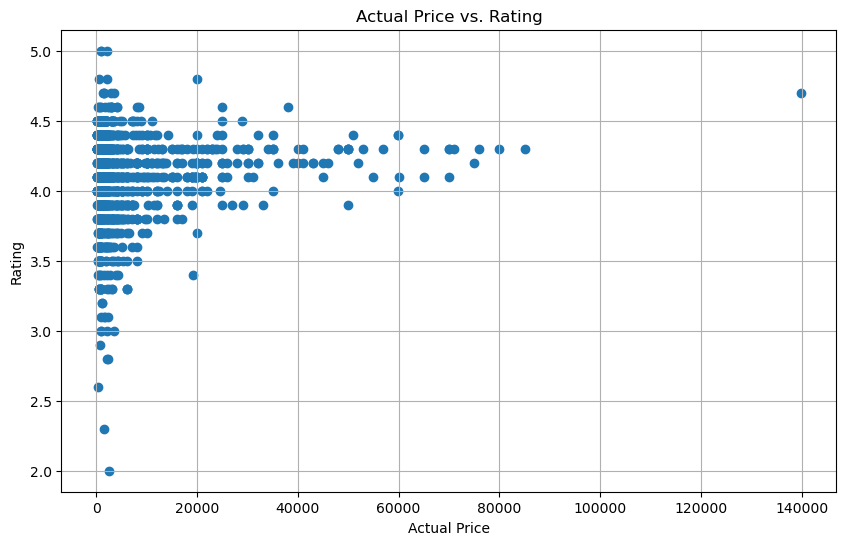

In [9]:
# Plot actual_price vs. rating
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.title('Actual Price vs. Rating')
plt.grid(True)
# Save the plot
plt.savefig(os.path.join(str(output_dir), 'scatter_price_rating.png'))
plt.show()

## Box Plot: Discounted Price Distribution by Category

FileNotFoundError: [Errno 2] No such file or directory: '../Visuals/visuals\\boxplot_price_category.png'

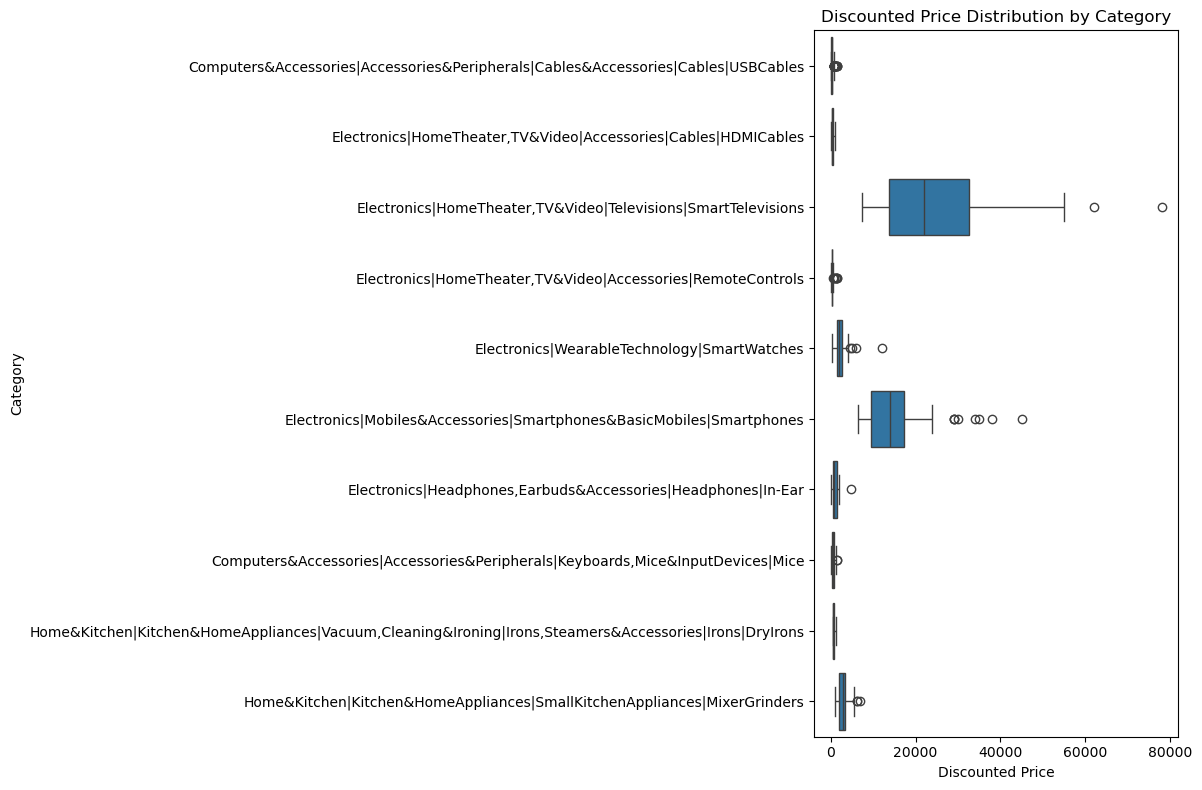

In [12]:
# Box plot of discounted_price by category
plt.figure(figsize=(12, 8))
# Taking the top 10 categories for better visualization
top_categories = df['category'].value_counts().nlargest(10).index
df_top_cat = df[df['category'].isin(top_categories)]
sns.boxplot(data=df_top_cat, x='discounted_price', y='category')
plt.xlabel('Discounted Price')
plt.ylabel('Category')
plt.title('Discounted Price Distribution by Category')
plt.tight_layout()
plt.savefig(os.path.join(str(output_dir), 'boxplot_price_category.png'))
plt.show()

## Heatmap: Correlation Matrix of Numerical Features

FileNotFoundError: [Errno 2] No such file or directory: '../Visuals/visuals\\heatmap_correlation.png'

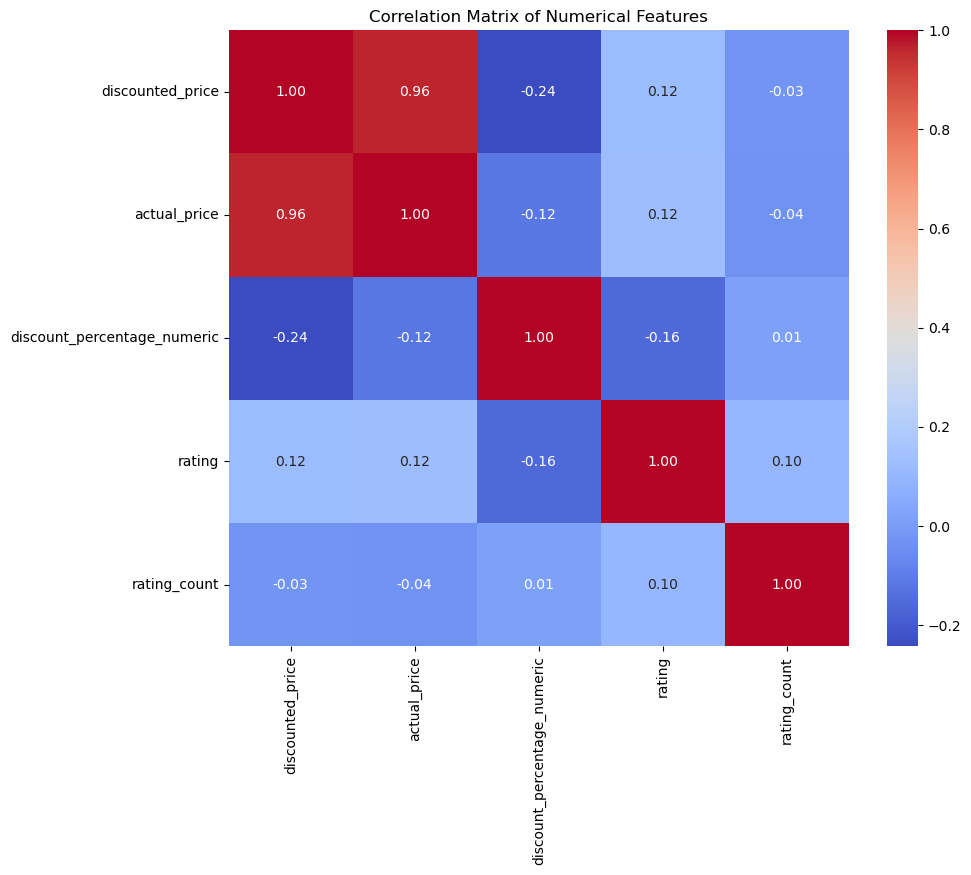

In [11]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
# convert discount_percentage like '64%' to numeric (remove '%' and coerce errors)
df['discount_percentage_numeric'] = pd.to_numeric(df['discount_percentage'].str.replace('%', '', regex=False), errors='coerce')
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage_numeric', 'rating', 'rating_count']
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig(os.path.join(str(output_dir), 'heatmap_correlation.png'))
plt.show()